In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
from pprint import pprint

In [2]:
featureSet = ['G_gender_enc','name_distance', 'loc_distance', 'username_distance', 'desc_distance', 'T_gender_enc']

In [3]:
#Use the Data files for this method
def plot_data(path, features, title="Some Model"):
    data = []
    
    with open(path, "r", encoding="utf-8") as datafile:
        for line in datafile:
            dataset = json.loads(line)
            linefeatures = dataset["Features"]
            if sorted(linefeatures) == sorted(features):
                data = dataset["Data"]
                break;
    
    x_fold = []
    y_prec = []
    y_rec = []
    y_acc = []
    y_f1 = []
    
    for fold in data:
        x_fold.append(fold['Fold'])
        y_prec.append(fold['Precision'])
        y_rec.append(fold['Recall'])
        y_acc.append(fold['Accuracy'])
        y_f1.append(fold['F1_score'] * 100)
    
    sns.set()
    plt.plot(x_fold, y_prec, color="blue", label="Precisiion")
    plt.plot(x_fold, y_rec, color="red", label="Recall")
    plt.plot(x_fold, y_acc, color="green", label="Accuracy")
    plt.plot(x_fold, y_f1, color="purple", label="F1 Score")
    plt.xlabel("Fold")
    plt.ylabel("Percentage %")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.ylim([60,100])
    plt.show()

In [30]:
#Use the result files for this method
def precision_recall_curve(paths, features, title=""):
    data_sets = [] #List of lists of dictionaries, each list contains fold data per model
    
    for path in paths:
        with open(path, "r", encoding="utf-8") as datafile:
            for line in datafile:
                dataset = json.loads(line)
                linefeatures = dataset["Features"]
                if sorted(linefeatures) == sorted(features):
                    data_sets.append(dataset['Data'])
                    break;
    
    #careful that dictionary matches order of the files visited in paths
    model_colours = {"GaussianNB": "cyan",
                     "MultinomialNB": "black",
                     "SVC Linear": "yellow",
                     "SVC rbf": "magenta",
                     "Random Forrest": "forestgreen"}
    
    sns.set()
    
    #Line commented out plots all of them, uncomment at your own risk
#     for data, model, colour in zip(data_sets, model_colours.keys(), model_colours.values()):
#         plt.plot([j['Recall'] for j in data], [j['Precision'] for j in data], color=colour, label=model)

    plt.plot([j['Recall'] for j in data_sets[1]], [j['Precision'] for j in data_sets[1]], color="m", label="GaussianNB")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.title(str(features))
    plt.grid(True)
    plt.show()

In [5]:
def plot_best_metric(paths, metric):
    max_metric = []
    
    for path in paths:
        title = path[8:-5]
        with open(path, "r", encoding="utf-8") as file:
            max_met = {"Features":[], metric:0, "Title": title}
            for line in file:
                dataset = json.loads(line)
                if dataset[metric] > max_met[metric]:
                    max_met["Features"] = dataset["Features"]
                    max_met[metric] = dataset[metric]
        max_metric.append(max_met)
    
    sns.set()
    bars = ("GaussianNB", "MultinomialNB", "SVCLinear", "SVCrbf", "RandomForrest")
    y_height = np.arange(len(bars))
    accuracies = [i[metric] for i in max_metric]
    pprint(max_metric)
    plt.bar(y_height, accuracies, align="center", alpha=0.5)
    plt.xticks(y_height, bars)
    plt.ylabel(metric)
    plt.show()
    

In [6]:
def plot_everything(paths, features, title="Some Model"):
    data = []
    
    for path in paths:
        with open(path, "r", encoding="utf-8") as datafile:
            for line in datafile:
                dataset = json.loads(line)
                linefeatures = dataset["Features"]
                if sorted(linefeatures) == sorted(features):
                    data.append(dataset)
                    break;
    
    x_model = ["MultinomialNB","GaussianNB", "SVC Linear", "SVC Rbf", "Random Forrest"]
    y_prec = []
    y_rec = []
    y_acc = []
    y_f1 = []
    
    for model in data:
        y_prec.append(model['Precision'])
        y_rec.append(model['Recall'])
        y_acc.append(model['Accuracy'])
        y_f1.append(model['F1_score'] * 100)
    
    sns.set()
    plt.plot(x_model, y_prec, color="blue", label="Precisiion")
    plt.plot(x_model, y_rec, color="red", label="Recall")
    plt.plot(x_model, y_acc, color="green", label="Accuracy")
    plt.plot(x_model, y_f1, color="purple", label="F1 Score")
    plt.xlabel("Model")
    plt.ylabel("Percentage %")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.ylim([0,100])
    plt.show()

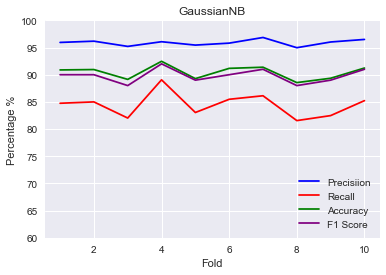

In [7]:
path = "results/naivebayes/GaussianDataComp.json"
plot_data(path, featureSet, title = "GaussianNB")

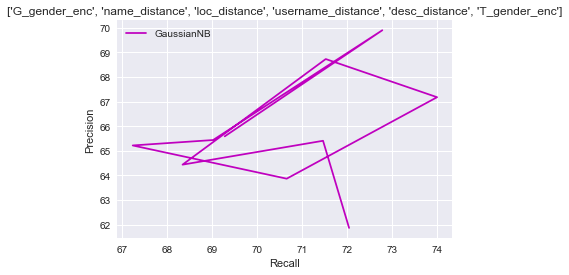

In [31]:
paths = ["results/naivebayes/GaussianDataComp.json",
        "results/naivebayes/MultinomialDataComp.json",
        "results/SVM/SVCLinearData.json",
        "results/SVM/SVCrbfData.json",
        "results/RandomForrest/RandomForrestEst1000Data.json"]
precision_recall_curve(paths, featureSet)

[{'Accuracy': 90.45,
  'Features': ['name_distance',
               'loc_distance',
               'username_distance',
               'desc_distance'],
  'Title': 'naivebayes/GaussianResultsComp'},
 {'Accuracy': 71.33,
  'Features': ['G_gender_enc', 'name_distance', 'username_distance'],
  'Title': 'naivebayes/MultinomialResultsComp'},
 {'Accuracy': 87.77,
  'Features': ['name_distance',
               'loc_distance',
               'username_distance',
               'desc_distance',
               'T_gender_enc'],
  'Title': 'SVM/SVCLinearResults'},
 {'Accuracy': 90.84,
  'Features': ['name_distance',
               'loc_distance',
               'username_distance',
               'desc_distance'],
  'Title': 'SVM/SVCrbfResults'},
 {'Accuracy': 90.95,
  'Features': ['G_gender_enc',
               'name_distance',
               'loc_distance',
               'username_distance',
               'desc_distance',
               'T_gender_enc'],
  'Title': 'RandomForrest/RandomForrestE

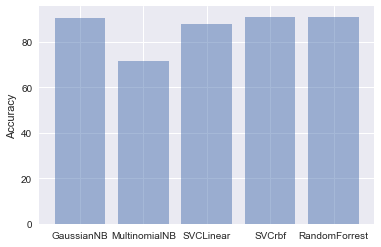

In [9]:
paths = ["results/naivebayes/GaussianResultsComp.json",
        "results/naivebayes/MultinomialResultsComp.json",
        "results/SVM/SVCLinearResults.json",
        "results/SVM/SVCrbfResults.json",
        "results/RandomForrest/RandomForrestEst1000Results.json"]
plot_best_metric(paths, "Accuracy")

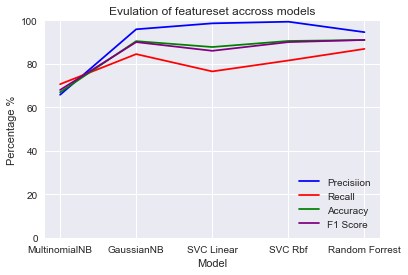

In [10]:
paths = ["results/naivebayes/MultinomialResultsComp.json",
        "results/naivebayes/GaussianResultsComp.json",
        "results/SVM/SVCLinearResults.json",
        "results/SVM/SVCrbfResults.json",
        "results/RandomForrest/RandomForrestEst1000Results.json"]
plot_everything(paths, featureSet, title="Evulation of featureset accross models")

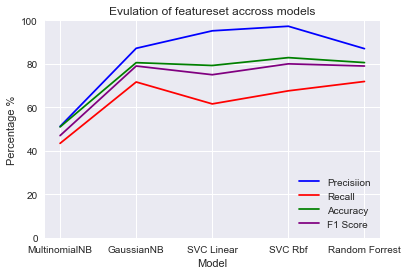

In [11]:
plot_everything(paths, ['username_distance', "loc_distance"], title="Evulation of featureset accross models")